In [1]:
""" import necessary libraries """
import noisereduce as nr

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from pydub import AudioSegment
import soundfile as sf
from torch import hub

C:\Users\eholy\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\eholy\anaconda3\envs\tf\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


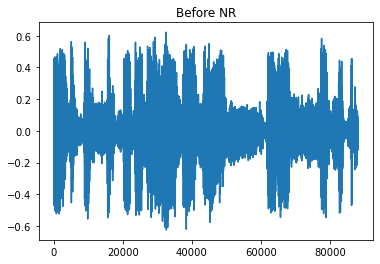

In [2]:
""" reduce noise """
#filename = "PlaneWspeech.wav"
file = "merged"
filename = file + ".wav"
# load data
#rate, data = wavfile.read("id10353_merged.wav")
data, rate = librosa.load(filename)

plt.figure()
plt.title("Before NR")
plt.plot(data)
plt.show()
ipd.Audio(data, rate=rate)

In [3]:
""" split audio """

model = hub.load('JorisCos/asteroid', 'conv_tasnet', 'JorisCos/ConvTasNet_Libri2Mix_sepclean_8k')
nr_filepath = 'C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/' + filename
model.separate(nr_filepath, resample=True, force_overwrite=True)


Using cache found in C:\Users\eholy/.cache\torch\hub\JorisCos_asteroid_master


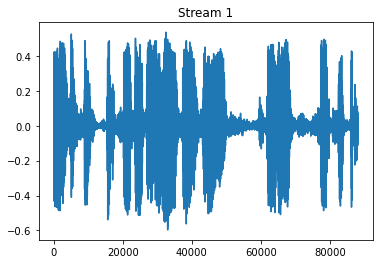

In [4]:
""" audio stream 1 """

s1_filepath = 'C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/'
s1_filename = file + '_est1.wav'
s1, rate = librosa.load(s1_filepath+s1_filename)

plt.figure()
plt.title("Stream 1")
plt.plot(s1)
plt.show()

ipd.Audio(s1, rate=rate)

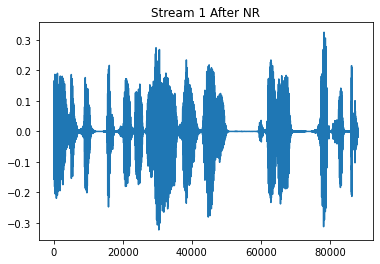

In [5]:
""" reduce noise in stream 1 """

reduced_noise = nr.reduce_noise(y=s1, sr=rate)

plt.figure()
plt.title("Stream 1 After NR")
plt.plot(reduced_noise)
plt.show()

#nr_filepath = 'C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/' + 'nr_' + filename 
#sf.write(nr_filepath, reduced_noise, rate)

ipd.Audio(reduced_noise, rate=rate)

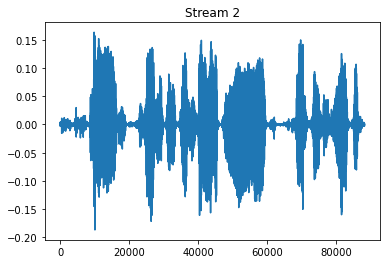

In [6]:
""" audio stream 2 """

s2_filepath = 'C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/'
s2_filename = file + '_est2.wav'
s2, rate = librosa.load(s2_filepath+s2_filename)

plt.figure()
plt.title("Stream 2")
plt.plot(s2)
plt.show()

ipd.Audio(s2, rate=rate)

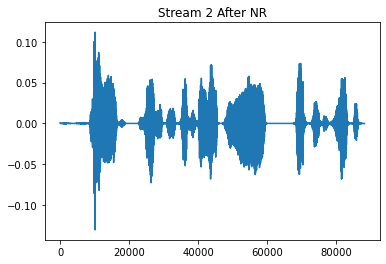

In [7]:
""" reduce noise in stream 2 """

reduced_noise = nr.reduce_noise(y=s2, sr=rate)

plt.figure()
plt.title("Stream 2 After NR")
plt.plot(reduced_noise)
plt.show()

#nr_filepath = 'C:/Users/eholy/Desktop/SD/git/voiceseperation/Wrapper/' + 'nr_' + filename 
#sf.write(nr_filepath, reduced_noise, rate)

ipd.Audio(reduced_noise, rate=rate)